In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek

In [ ]:
df = pd.read_csv("Creditcard_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,763
1,9


The dataset is highly imbalanced. Fraud cases are very few compared to normal transactions.

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

y_bal.value_counts()

,count
Class,
0,763
1,763


In [ ]:
samples = []

for i in range(5):
    X_s, _, y_s, _ = train_test_split(
        X_bal, y_bal, train_size=0.6, random_state=i
    )
    samples.append((X_s, y_s))

In [ ]:
sampling_methods = {
    "Sampling1": RandomUnderSampler(),
    "Sampling2": RandomOverSampler(),
    "Sampling3": SMOTE(),
    "Sampling4": NearMiss(),
    "Sampling5": SMOTETomek()
}

In [ ]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": KNeighborsClassifier(),
    "M5": SVC()
}

In [ ]:
results = {}

for samp_name, sampler in sampling_methods.items():
    results[samp_name] = {}

    X_res, y_res = sampler.fit_resample(X_bal, y_bal)

    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.3, random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[samp_name][model_name] = round(acc * 100, 2)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
result_df = pd.DataFrame(results).T
result_df

,M1,M2,M3,M4,M5
Sampling1,93.23,97.82,99.56,86.24,69.43
Sampling2,90.39,98.03,99.34,84.72,67.69
Sampling3,90.39,98.03,99.13,84.72,67.69
Sampling4,92.14,96.94,99.56,85.59,68.56
Sampling5,92.83,96.86,99.55,85.87,70.40


<Axes: >

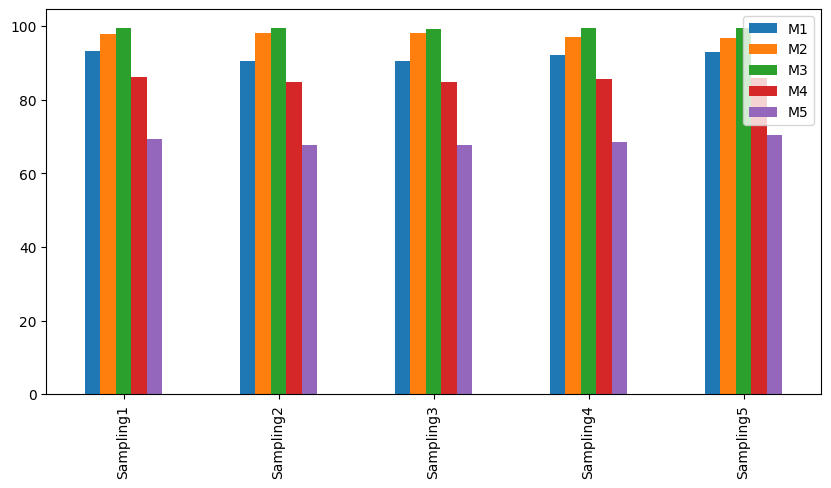

In [24]:
result_df.plot(kind='bar', figsize=(10,5))

Observations:
(I) Different sampling techniques affect model performance differently.
(II) Some models perform better with undersampling, while others benefit from oversampling or hybrid methods.
(III) There is no single best sampling method for all models.